# Assignment 1 
In this assignment you will learn about linear regression.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

## Data Processing

### Loading Data

In [3]:
data = pd.read_csv('podatki_PM.csv')

# Date | Global Radiation | Wind Speed | Wind gust max | Precipitation sum | Moisture mean | Temparature Blood Mean |Temparture location mean | PM10 | PM_Today | sindD| cos D
new_names = {
'Datum' : 'Date',
'Glob_sevanje_mean' : 'Global_radiation_mean',
'Hitrost_vetra_mean' : 'Wind_speed_mean',
'Sunki_vetra_max' : 'Wind_gust_max',
'Padavine_sum' : 'Precipitation_sum',
'Vlaga_mean' : 'Moisture_mean',
'Temperatura_Krvavec_mean' : 'Temperature_Krvavec_mean',
'Temperatura_lokacija_mean' : 'Temperature_location_mean',
'PM10' : 'PM10',
'PM_vceraj' : 'PM_yesterday',
'sinD' : 'sinD',
'cosD' : 'cosD'
}

data.rename(columns=new_names, inplace=True)

# Convert column date into datetime
data['Date'] = pd.to_datetime(data['Date'])

# sort by date
data = data.sort_values(by='Date')

### Data overview

In [4]:
data.head()

# Date | Global Radiation | Wind Speed | Wind gust max | Precipitation sum | Moisture mean | Temparature Blood Mean |Temparture location mean | PM10 | PM_Today | sindD| cos D

,Date,Global_radiation_mean,Wind_speed_mean,Wind_gust_max,Precipitation_sum,Moisture_mean,Temperature_Krvavec_mean,Temperature_location_mean,PM10,PM_yesterday,sinD,cosD
0,2013-01-02,0.125,0.6750,2.9,0.0,79.1750,-2.9875,3.2000,44.3,51.4,0.034899,0.999391
1,2013-01-03,0.375,0.7375,2.6,0.0,93.5625,-4.5250,2.8750,49.0,44.3,0.052336,0.998630
2,2013-01-04,0.875,0.8875,3.2,0.0,93.3000,2.9625,0.6875,61.3,49.0,0.069756,0.997564
3,2013-01-05,0.750,1.0000,4.5,0.0,94.2625,2.9875,0.5875,38.9,61.3,0.087156,0.996195
4,2013-01-06,0.250,0.5750,2.3,0.0,87.6500,-0.2500,3.1625,30.3,38.9,0.104528,0.994522


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       1213 non-null   datetime64[ns]
 1   Global_radiation_mean      1213 non-null   float64       
 2   Wind_speed_mean            1213 non-null   float64       
 3   Wind_gust_max              1213 non-null   float64       
 4   Precipitation_sum          1213 non-null   float64       
 5   Moisture_mean              1213 non-null   float64       
 6   Temperature_Krvavec_mean   1213 non-null   float64       
 7   Temperature_location_mean  1213 non-null   float64       
 8   PM10                       1213 non-null   float64       
 9   PM_yesterday               1180 non-null   float64       
 10  sinD                       1213 non-null   float64       
 11  cosD                       1213 non-null   float64       
dtypes: dat

In [6]:
data.describe()

,Date,Global_radiation_mean,Wind_speed_mean,Wind_gust_max,Precipitation_sum,Moisture_mean,Temperature_Krvavec_mean,Temperature_location_mean,PM10,PM_yesterday,sinD,cosD
count,1213,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1180.000000,1213.000000,1213.000000
mean,2014-12-16 00:33:14.394064384,37.489963,0.889355,3.521599,1.283182,85.553038,3.591235,9.333694,25.059110,25.161864,0.075354,-0.032182
min,2013-01-02 00:00:00,0.000000,0.000000,0.000000,0.000000,35.412500,-14.750000,-9.675000,1.800000,1.800000,-1.000000,-1.000000
25%,2013-12-19 00:00:00,2.125000,0.537500,2.300000,0.000000,79.750000,-1.562500,3.375000,14.400000,14.400000,-0.601815,-0.754710
50%,2014-11-17 00:00:00,20.875000,0.725000,2.800000,0.000000,87.850000,3.750000,10.162500,20.300000,20.350000,0.139173,-0.069756
75%,2016-02-26 00:00:00,66.250000,1.050000,4.100000,0.200000,93.287500,8.475000,15.075000,30.200000,30.300000,0.754710,0.694658
max,2016-12-30 00:00:00,138.375000,4.612500,14.900000,38.500000,99.712500,52.400000,24.087500,114.900000,114.900000,1.000000,1.000000
std,NaN,40.804089,0.606833,1.991321,4.107405,9.926650,7.034411,7.152552,16.495061,16.592885,0.693109,0.716733


In [7]:
# Checking the missing values
data.isnull().sum()

Date                          0
Global_radiation_mean         0
Wind_speed_mean               0
Wind_gust_max                 0
Precipitation_sum             0
Moisture_mean                 0
Temperature_Krvavec_mean      0
Temperature_location_mean     0
PM10                          0
PM_yesterday                 33
sinD                          0
cosD                          0
dtype: int64

### Dealing with missing data

In [8]:
# I decided to fill PM_yesterday by the mean:
data['PM_yesterday'].fillna(data['PM_yesterday'].mean(), inplace=True)

C:\Users\doria\AppData\Local\Temp\ipykernel_19952\2011081706.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PM_yesterday'].fillna(data['PM_yesterday'].mean(), inplace=True)


## Visulaise the data

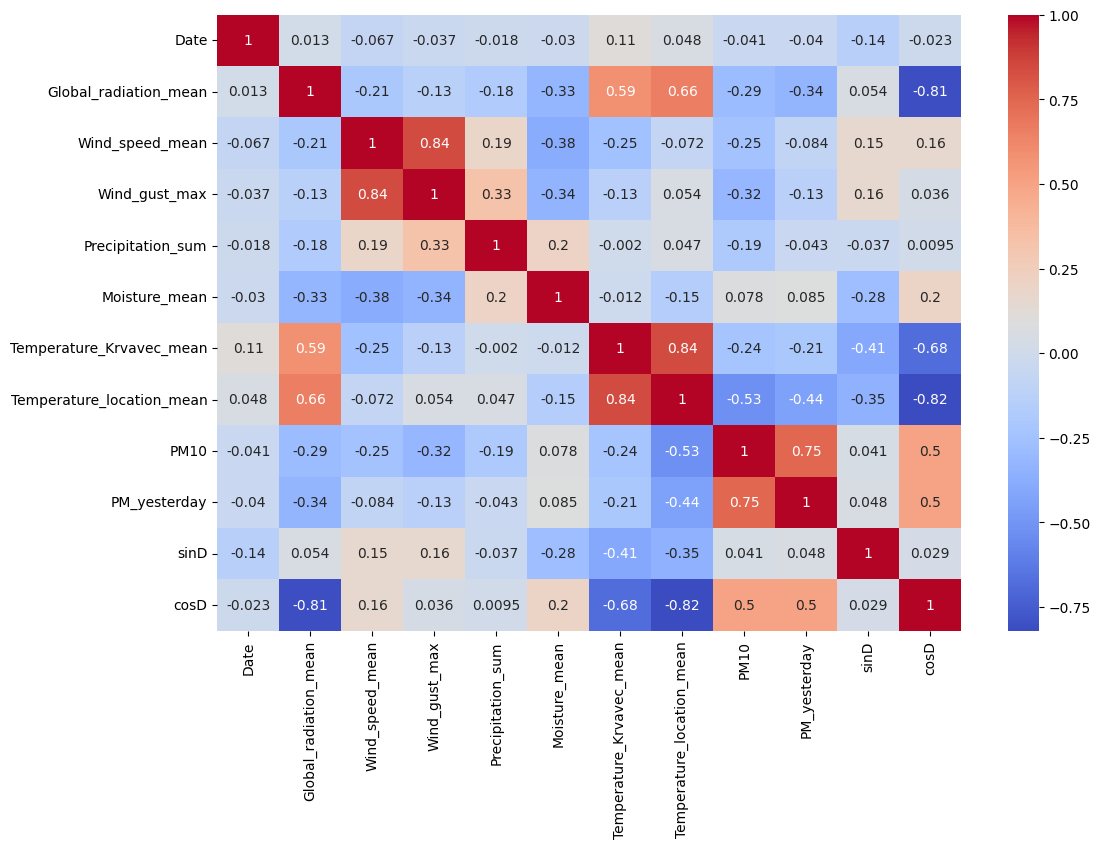

In [9]:
# Corrplot to identify patterns

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

## Select output y and features x
$y$ is `PM10` the features are everything else

In [10]:
X = data[['Global_radiation_mean', 'Wind_speed_mean', 'Wind_gust_max', 'Precipitation_sum',
          'Moisture_mean', 'Temperature_Krvavec_mean', 'Temperature_location_mean',
          'PM_yesterday', 'sinD', 'cosD']]
y = data['PM10']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Split dataset between training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## Scaling
We scale after the splitting to avoid the data leakage

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [14]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Linear regression

If we have $X=X_0,\cdots,X_p$ and we want to predict a real output $Y$, the linear regression model is of the form :

$$
\begin{align*}
f(X) &= \beta_0 + \sum_{j=1}^p X_j \beta_j \\
&= \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p
\end{align*}
$$

Our aim is to minimise $RSS(\beta)$ to find the optimal $\beta$.



From p.45 of ESL, we find the unique solution 
$$
\hat\beta = (X^T X)^{-1} X^T y
$$

with $X$ the $N \times (p+1)$ matrix with each row an input vector (with 1 in the first position for the **intercept $\beta_0$**)

### Homemade linear regression

In [15]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train] # concatenate over the second axis in order to X = [[1,vector_1],[1,vector_2],...]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [16]:
XtX = X_train.T @ X_train

det = np.linalg.det(XtX)

if det > 1e-6: # test if the matrix in invertible
    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
else:
    beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train # use the Pseudo inverse

y_pred_train = X_train @ beta

y_pred_test = X_test @ beta


In [17]:
rmse_train = root_mean_squared_error(y_train, y_pred_train)
rmse_test = root_mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(r2_train)

0.678420712204219


### Scikit-learn Linear Regression

In [18]:
model = LinearRegression(fit_intercept=False)  # Already added intercept manually
model.fit(X_train, y_train)

y_pred_train_sklearn = model.predict(X_train)
y_pred_test_sklearn = model.predict(X_test)


In [19]:
rmse_train_sklearn = root_mean_squared_error(y_train, y_pred_train_sklearn)
rmse_test_sklearn = root_mean_squared_error(y_test, y_pred_test_sklearn)
r2_train_sklearn = r2_score(y_train, y_pred_train_sklearn)
r2_test_sklearn = r2_score(y_test, y_pred_test_sklearn)


In [20]:
print("Homemade - Training RMSE:", rmse_train, "R2:", r2_train)
print("Homemade - Testing RMSE:", rmse_test, "R2:", r2_test)
print("Scikit-Learn Model - Training RMSE:", rmse_train_sklearn, "R2:", r2_train_sklearn)
print("Scikit-Learn Model - Testing RMSE:", rmse_test_sklearn, "R2:", r2_test_sklearn)


Homemade - Training RMSE: 9.19830456450892 R2: 0.678420712204219
Homemade - Testing RMSE: 8.344272469278875 R2: 0.7722542577726482
Scikit-Learn Model - Training RMSE: 9.19830456450892 R2: 0.678420712204219
Scikit-Learn Model - Testing RMSE: 8.344272469278875 R2: 0.7722542577726482


## Diagnostics plots
Residual Vs Fitted

Normal QQ

Scale-Location

Residual Vs Leverage

In [21]:
residuals = y_train - y_pred_train


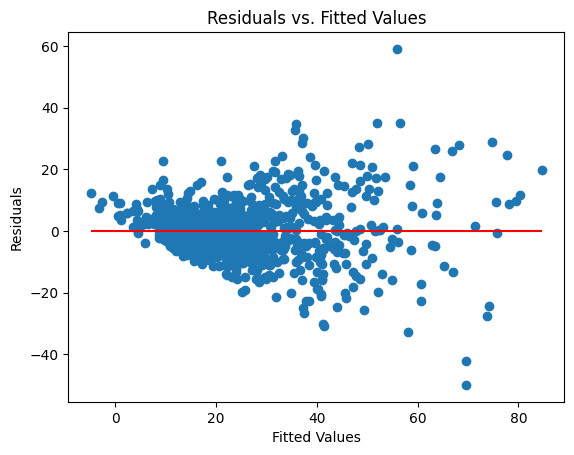

In [22]:
plt.scatter(y_pred_train, residuals)
plt.hlines(y=0, xmin=min(y_pred_train), xmax=max(y_pred_train), colors='red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


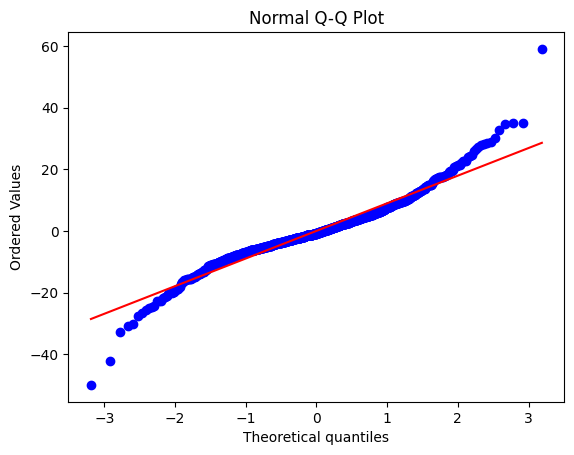

In [23]:
# QQplot
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()
